https://www.endcoronavirus.org/countries

In [2]:
xls = pd.ExcelFile("https://github.com/OxCGRT/covid-policy-tracker/raw/master/data/timeseries/OxCGRT_timeseries_all.xlsx")
fc_data = pd.read_excel(xls, 'h6_facial_coverings')

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
# Load CSV data directly from the URL with pandas, the options are needed to prevent
# reading of records with key "NA" (Namibia) as NaN
data = pd.read_csv(
    "https://storage.googleapis.com/covid19-open-data/v2/oxford-government-response.csv",
    keep_default_na=False,
    na_values=[""],
)

# NOTE: We are only downloading the last day of data, but you can download all
# the data at once if you'd like by changing the URL to:
# https://storage.googleapis.com/covid19-open-data/v2/main.csv

# Print a small snippet of the dataset
print(f"The dataset currently contains {len(data)} records, here is a sample:")
data.sample(2)

The dataset currently contains 74868 records, here is a sample:


,date,key,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,stringency_index
9132,2020-02-08,US_NE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,11.11
5809,2020-01-25,TZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


choose specific policies (closure and health)

In [38]:
data_closure = data[['date','key','school_closing', 'workplace_closing', 'cancel_public_events','restrictions_on_gatherings','public_transport_closing','stay_at_home_requirements','restrictions_on_internal_movement','international_travel_controls']]
data_health = data[['date','key', 'testing_policy', 'contact_tracing','emergency_investment_in_healthcare','investment_in_vaccines']] 

pick: 
GREEN 
1. Australia              AU
2. New Zealand       NZ
3. Singapore           SG  
4. Thailand              TH
5. Somalia               SO

YELLOW
1. China                CN   
2. Egypt                EG
3. Israel                 IL
4. Kyrgyzstan       KG
5. Tajikistan          TJ

RED
1. USA                 US
2. Brazil               BR
3. Canada           CA
4. Philippines      PH
5. Russia            RU


Australia, New Zealand, Singapore, Thailand, Somalia

Closure Policy Data of AU

In [39]:
data_closure_AU = data_closure[data_closure['key'] == "AU"]

In [40]:
s1 = (data_closure_AU['school_closing'] - data_closure_AU['school_closing'].min())/(data_closure_AU['school_closing'].max() - data_closure_AU['school_closing'].min())
data_closure_AU = data_closure_AU.drop(['school_closing'],axis=1)
data_closure_AU.insert(2,'school_closing',s1)
s2 = (data_closure_AU['workplace_closing'] - data_closure_AU['workplace_closing'].min())/(data_closure_AU['workplace_closing'].max() - data_closure_AU['workplace_closing'].min())
data_closure_AU = data_closure_AU.drop(['workplace_closing'],axis=1)
data_closure_AU.insert(3,'workplace_closing',s2)
s3 = (data_closure_AU['cancel_public_events'] - data_closure_AU['cancel_public_events'].min())/(data_closure_AU['cancel_public_events'].max() - data_closure_AU['cancel_public_events'].min())
data_closure_AU = data_closure_AU.drop(['cancel_public_events'],axis=1)
data_closure_AU.insert(4,'cancel_public_events',s3)
s4 = (data_closure_AU['restrictions_on_gatherings'] - data_closure_AU['restrictions_on_gatherings'].min())/(data_closure_AU['restrictions_on_gatherings'].max() - data_closure_AU['restrictions_on_gatherings'].min())
data_closure_AU = data_closure_AU.drop(['restrictions_on_gatherings'],axis=1)
data_closure_AU.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_AU['public_transport_closing'] - data_closure_AU['public_transport_closing'].min())/(data_closure_AU['public_transport_closing'].max() - data_closure_AU['public_transport_closing'].min())
data_closure_AU = data_closure_AU.drop(['public_transport_closing'],axis=1)
data_closure_AU.insert(6,'public_transport_closing',s5)
s6 = (data_closure_AU['stay_at_home_requirements'] - data_closure_AU['stay_at_home_requirements'].min())/(data_closure_AU['stay_at_home_requirements'].max() - data_closure_AU['stay_at_home_requirements'].min())
data_closure_AU = data_closure_AU.drop(['stay_at_home_requirements'],axis=1)
data_closure_AU.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_AU['restrictions_on_internal_movement'] - data_closure_AU['restrictions_on_internal_movement'].min())/(data_closure_AU['restrictions_on_internal_movement'].max() - data_closure_AU['restrictions_on_internal_movement'].min())
data_closure_AU = data_closure_AU.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_AU.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_AU['international_travel_controls'] - data_closure_AU['international_travel_controls'].min())/(data_closure_AU['international_travel_controls'].max() - data_closure_AU['international_travel_controls'].min())
data_closure_AU = data_closure_AU.drop(['international_travel_controls'],axis=1)
data_closure_AU.insert(9,'international_travel_controls',s8)

In [41]:
AU_closure_average_ontime = data_closure_AU.mean(axis = 0) 
AU_closure_average = AU_closure_average_ontime.mean()
AU_closure_average

0.6304517133956387

Health Policy Data of AU

In [42]:
data_health_AU = data_health[data_health['key'] == "AU"]

s1 = (data_health_AU['testing_policy'] - data_health_AU['testing_policy'].min())/(data_health_AU['testing_policy'].max() - data_health_AU['testing_policy'].min())
data_health_AU = data_health_AU.drop(['testing_policy'],axis=1)
data_health_AU.insert(2,'testing_policy',s1)
s2 = (data_health_AU['contact_tracing'] - data_health_AU['contact_tracing'].min())/(data_health_AU['contact_tracing'].max() - data_health_AU['contact_tracing'].min())
data_health_AU = data_health_AU.drop(['contact_tracing'],axis=1)
data_health_AU.insert(3,'contact_tracing',s2)
s3 = (data_health_AU['emergency_investment_in_healthcare'] - data_health_AU['emergency_investment_in_healthcare'].min())/(data_health_AU['emergency_investment_in_healthcare'].max() - data_health_AU['emergency_investment_in_healthcare'].min())
data_health_AU = data_health_AU.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_AU.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_AU['investment_in_vaccines'] - data_health_AU['investment_in_vaccines'].min())/(data_health_AU['investment_in_vaccines'].max() - data_health_AU['investment_in_vaccines'].min())
data_health_AU = data_health_AU.drop(['investment_in_vaccines'],axis=1)
data_health_AU.insert(5,'investment_in_vaccines',s4)

AU_health_average_ontime = data_health_AU.mean(axis = 0) 
AU_health_average = AU_health_average_ontime.mean()
AU_health_average

0.4134327067716877

In [43]:
data_closure_NZ = data_closure[data_closure['key'] == "NZ"]

s1 = (data_closure_NZ['school_closing'] - data_closure_NZ['school_closing'].min())/(data_closure_NZ['school_closing'].max() - data_closure_NZ['school_closing'].min())
data_closure_NZ = data_closure_NZ.drop(['school_closing'],axis=1)
data_closure_NZ.insert(2,'school_closing',s1)
s2 = (data_closure_NZ['workplace_closing'] - data_closure_NZ['workplace_closing'].min())/(data_closure_NZ['workplace_closing'].max() - data_closure_NZ['workplace_closing'].min())
data_closure_NZ = data_closure_NZ.drop(['workplace_closing'],axis=1)
data_closure_NZ.insert(3,'workplace_closing',s2)
s3 = (data_closure_NZ['cancel_public_events'] - data_closure_NZ['cancel_public_events'].min())/(data_closure_NZ['cancel_public_events'].max() - data_closure_NZ['cancel_public_events'].min())
data_closure_NZ = data_closure_NZ.drop(['cancel_public_events'],axis=1)
data_closure_NZ.insert(4,'cancel_public_events',s3)
s4 = (data_closure_NZ['restrictions_on_gatherings'] - data_closure_NZ['restrictions_on_gatherings'].min())/(data_closure_NZ['restrictions_on_gatherings'].max() - data_closure_NZ['restrictions_on_gatherings'].min())
data_closure_NZ = data_closure_NZ.drop(['restrictions_on_gatherings'],axis=1)
data_closure_NZ.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_NZ['public_transport_closing'] - data_closure_NZ['public_transport_closing'].min())/(data_closure_NZ['public_transport_closing'].max() - data_closure_NZ['public_transport_closing'].min())
data_closure_NZ = data_closure_NZ.drop(['public_transport_closing'],axis=1)
data_closure_NZ.insert(6,'public_transport_closing',s5)
s6 = (data_closure_NZ['stay_at_home_requirements'] - data_closure_NZ['stay_at_home_requirements'].min())/(data_closure_NZ['stay_at_home_requirements'].max() - data_closure_NZ['stay_at_home_requirements'].min())
data_closure_NZ = data_closure_NZ.drop(['stay_at_home_requirements'],axis=1)
data_closure_NZ.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_NZ['restrictions_on_internal_movement'] - data_closure_NZ['restrictions_on_internal_movement'].min())/(data_closure_NZ['restrictions_on_internal_movement'].max() - data_closure_NZ['restrictions_on_internal_movement'].min())
data_closure_NZ = data_closure_NZ.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_NZ.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_NZ['international_travel_controls'] - data_closure_NZ['international_travel_controls'].min())/(data_closure_NZ['international_travel_controls'].max() - data_closure_NZ['international_travel_controls'].min())
data_closure_NZ = data_closure_NZ.drop(['international_travel_controls'],axis=1)
data_closure_NZ.insert(9,'international_travel_controls',s8)

NZ_closure_average_ontime = data_closure_NZ.mean(axis = 0) 
NZ_closure_average = NZ_closure_average_ontime.mean()
print(NZ_closure_average)


data_health_NZ = data_health[data_health['key'] == "NZ"]
s1 = (data_health_NZ['testing_policy'] - data_health_NZ['testing_policy'].min())/(data_health_NZ['testing_policy'].max() - data_health_NZ['testing_policy'].min())
data_health_NZ = data_health_NZ.drop(['testing_policy'],axis=1)
data_health_NZ.insert(2,'testing_policy',s1)
s2 = (data_health_NZ['contact_tracing'] - data_health_NZ['contact_tracing'].min())/(data_health_NZ['contact_tracing'].max() - data_health_NZ['contact_tracing'].min())
data_health_NZ = data_health_NZ.drop(['contact_tracing'],axis=1)
data_health_NZ.insert(3,'contact_tracing',s2)
s3 = (data_health_NZ['emergency_investment_in_healthcare'] - data_health_NZ['emergency_investment_in_healthcare'].min())/(data_health_NZ['emergency_investment_in_healthcare'].max() - data_health_NZ['emergency_investment_in_healthcare'].min())
data_health_NZ = data_health_NZ.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_NZ.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_NZ['investment_in_vaccines'] - data_health_NZ['investment_in_vaccines'].min())/(data_health_NZ['investment_in_vaccines'].max() - data_health_NZ['investment_in_vaccines'].min())
data_health_NZ = data_health_NZ.drop(['investment_in_vaccines'],axis=1)
data_health_NZ.insert(5,'investment_in_vaccines',s4)

NZ_health_average_ontime = data_health_NZ.mean(axis = 0) 
NZ_health_average = NZ_health_average_ontime.mean()
print(NZ_health_average)

0.3259676159012453
0.39899621175701405


In [44]:
data_closure_SG = data_closure[data_closure['key'] == "SG"]

s1 = (data_closure_SG['school_closing'] - data_closure_SG['school_closing'].min())/(data_closure_SG['school_closing'].max() - data_closure_SG['school_closing'].min())
data_closure_SG = data_closure_SG.drop(['school_closing'],axis=1)
data_closure_SG.insert(2,'school_closing',s1)
s2 = (data_closure_SG['workplace_closing'] - data_closure_SG['workplace_closing'].min())/(data_closure_SG['workplace_closing'].max() - data_closure_SG['workplace_closing'].min())
data_closure_SG = data_closure_SG.drop(['workplace_closing'],axis=1)
data_closure_SG.insert(3,'workplace_closing',s2)
s3 = (data_closure_SG['cancel_public_events'] - data_closure_SG['cancel_public_events'].min())/(data_closure_SG['cancel_public_events'].max() - data_closure_SG['cancel_public_events'].min())
data_closure_SG = data_closure_SG.drop(['cancel_public_events'],axis=1)
data_closure_SG.insert(4,'cancel_public_events',s3)
s4 = (data_closure_SG['restrictions_on_gatherings'] - data_closure_SG['restrictions_on_gatherings'].min())/(data_closure_SG['restrictions_on_gatherings'].max() - data_closure_SG['restrictions_on_gatherings'].min())
data_closure_SG = data_closure_SG.drop(['restrictions_on_gatherings'],axis=1)
data_closure_SG.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_SG['public_transport_closing'] - data_closure_SG['public_transport_closing'].min())/(data_closure_SG['public_transport_closing'].max() - data_closure_SG['public_transport_closing'].min())
data_closure_SG = data_closure_SG.drop(['public_transport_closing'],axis=1)
data_closure_SG.insert(6,'public_transport_closing',s5)
s6 = (data_closure_SG['stay_at_home_requirements'] - data_closure_SG['stay_at_home_requirements'].min())/(data_closure_SG['stay_at_home_requirements'].max() - data_closure_SG['stay_at_home_requirements'].min())
data_closure_SG = data_closure_SG.drop(['stay_at_home_requirements'],axis=1)
data_closure_SG.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_SG['restrictions_on_internal_movement'] - data_closure_SG['restrictions_on_internal_movement'].min())/(data_closure_SG['restrictions_on_internal_movement'].max() - data_closure_SG['restrictions_on_internal_movement'].min())
data_closure_SG = data_closure_SG.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_SG.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_SG['international_travel_controls'] - data_closure_SG['international_travel_controls'].min())/(data_closure_SG['international_travel_controls'].max() - data_closure_SG['international_travel_controls'].min())
data_closure_SG = data_closure_SG.drop(['international_travel_controls'],axis=1)
data_closure_SG.insert(9,'international_travel_controls',s8)

SG_closure_average_ontime = data_closure_SG.mean(axis = 0) 
SG_closure_average = SG_closure_average_ontime.mean()
print(SG_closure_average)


data_health_SG = data_health[data_health['key'] == "SG"]
s1 = (data_health_SG['testing_policy'] - data_health_SG['testing_policy'].min())/(data_health_SG['testing_policy'].max() - data_health_SG['testing_policy'].min())
data_health_SG = data_health_SG.drop(['testing_policy'],axis=1)
data_health_SG.insert(2,'testing_policy',s1)
s2 = (data_health_SG['contact_tracing'] - data_health_SG['contact_tracing'].min())/(data_health_SG['contact_tracing'].max() - data_health_SG['contact_tracing'].min())
data_health_SG = data_health_SG.drop(['contact_tracing'],axis=1)
data_health_SG.insert(3,'contact_tracing',s2)
s3 = (data_health_SG['emergency_investment_in_healthcare'] - data_health_SG['emergency_investment_in_healthcare'].min())/(data_health_SG['emergency_investment_in_healthcare'].max() - data_health_SG['emergency_investment_in_healthcare'].min())
data_health_SG = data_health_SG.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_SG.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_SG['investment_in_vaccines'] - data_health_SG['investment_in_vaccines'].min())/(data_health_SG['investment_in_vaccines'].max() - data_health_SG['investment_in_vaccines'].min())
data_health_SG = data_health_SG.drop(['investment_in_vaccines'],axis=1)
data_health_SG.insert(5,'investment_in_vaccines',s4)

SG_health_average_ontime = data_health_SG.mean(axis = 0) 
SG_health_average = SG_health_average_ontime.mean()
print(SG_health_average)

0.5089379600420609
0.6356466876971609


In [45]:
data_closure_TH = data_closure[data_closure['key'] == "TH"]

s1 = (data_closure_TH['school_closing'] - data_closure_TH['school_closing'].min())/(data_closure_TH['school_closing'].max() - data_closure_TH['school_closing'].min())
data_closure_TH = data_closure_TH.drop(['school_closing'],axis=1)
data_closure_TH.insert(2,'school_closing',s1)
s2 = (data_closure_TH['workplace_closing'] - data_closure_TH['workplace_closing'].min())/(data_closure_TH['workplace_closing'].max() - data_closure_TH['workplace_closing'].min())
data_closure_TH = data_closure_TH.drop(['workplace_closing'],axis=1)
data_closure_TH.insert(3,'workplace_closing',s2)
s3 = (data_closure_TH['cancel_public_events'] - data_closure_TH['cancel_public_events'].min())/(data_closure_TH['cancel_public_events'].max() - data_closure_TH['cancel_public_events'].min())
data_closure_TH = data_closure_TH.drop(['cancel_public_events'],axis=1)
data_closure_TH.insert(4,'cancel_public_events',s3)
s4 = (data_closure_TH['restrictions_on_gatherings'] - data_closure_TH['restrictions_on_gatherings'].min())/(data_closure_TH['restrictions_on_gatherings'].max() - data_closure_TH['restrictions_on_gatherings'].min())
data_closure_TH = data_closure_TH.drop(['restrictions_on_gatherings'],axis=1)
data_closure_TH.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_TH['public_transport_closing'] - data_closure_TH['public_transport_closing'].min())/(data_closure_TH['public_transport_closing'].max() - data_closure_TH['public_transport_closing'].min())
data_closure_TH = data_closure_TH.drop(['public_transport_closing'],axis=1)
data_closure_TH.insert(6,'public_transport_closing',s5)
s6 = (data_closure_TH['stay_at_home_requirements'] - data_closure_TH['stay_at_home_requirements'].min())/(data_closure_TH['stay_at_home_requirements'].max() - data_closure_TH['stay_at_home_requirements'].min())
data_closure_TH = data_closure_TH.drop(['stay_at_home_requirements'],axis=1)
data_closure_TH.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_TH['restrictions_on_internal_movement'] - data_closure_TH['restrictions_on_internal_movement'].min())/(data_closure_TH['restrictions_on_internal_movement'].max() - data_closure_TH['restrictions_on_internal_movement'].min())
data_closure_TH = data_closure_TH.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_TH.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_TH['international_travel_controls'] - data_closure_TH['international_travel_controls'].min())/(data_closure_TH['international_travel_controls'].max() - data_closure_TH['international_travel_controls'].min())
data_closure_TH = data_closure_TH.drop(['international_travel_controls'],axis=1)
data_closure_TH.insert(9,'international_travel_controls',s8)

TH_closure_average_ontime = data_closure_TH.mean(axis = 0) 
TH_closure_average = TH_closure_average_ontime.mean()
print(TH_closure_average)


data_health_TH = data_health[data_health['key'] == "TH"]
s1 = (data_health_TH['testing_policy'] - data_health_TH['testing_policy'].min())/(data_health_TH['testing_policy'].max() - data_health_TH['testing_policy'].min())
data_health_TH = data_health_TH.drop(['testing_policy'],axis=1)
data_health_TH.insert(2,'testing_policy',s1)
s2 = (data_health_TH['contact_tracing'] - data_health_TH['contact_tracing'].min())/(data_health_TH['contact_tracing'].max() - data_health_TH['contact_tracing'].min())
data_health_TH = data_health_TH.drop(['contact_tracing'],axis=1)
data_health_TH.insert(3,'contact_tracing',s2)
s3 = (data_health_TH['emergency_investment_in_healthcare'] - data_health_TH['emergency_investment_in_healthcare'].min())/(data_health_TH['emergency_investment_in_healthcare'].max() - data_health_TH['emergency_investment_in_healthcare'].min())
data_health_TH = data_health_TH.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_TH.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_TH['investment_in_vaccines'] - data_health_TH['investment_in_vaccines'].min())/(data_health_TH['investment_in_vaccines'].max() - data_health_TH['investment_in_vaccines'].min())
data_health_TH = data_health_TH.drop(['investment_in_vaccines'],axis=1)
data_health_TH.insert(5,'investment_in_vaccines',s4)

TH_health_average_ontime = data_health_TH.mean(axis = 0) 
TH_health_average = TH_health_average_ontime.mean()
print(TH_health_average)

0.5371744791666667
0.3515625


In [46]:
data_closure_SO = data_closure[data_closure['key'] == "SO"]

s1 = (data_closure_SO['school_closing'] - data_closure_SO['school_closing'].min())/(data_closure_SO['school_closing'].max() - data_closure_SO['school_closing'].min())
data_closure_SO = data_closure_SO.drop(['school_closing'],axis=1)
data_closure_SO.insert(2,'school_closing',s1)
s2 = (data_closure_SO['workplace_closing'] - data_closure_SO['workplace_closing'].min())/(data_closure_SO['workplace_closing'].max() - data_closure_SO['workplace_closing'].min())
data_closure_SO = data_closure_SO.drop(['workplace_closing'],axis=1)
data_closure_SO.insert(3,'workplace_closing',s2)
s3 = (data_closure_SO['cancel_public_events'] - data_closure_SO['cancel_public_events'].min())/(data_closure_SO['cancel_public_events'].max() - data_closure_SO['cancel_public_events'].min())
data_closure_SO = data_closure_SO.drop(['cancel_public_events'],axis=1)
data_closure_SO.insert(4,'cancel_public_events',s3)
s4 = (data_closure_SO['restrictions_on_gatherings'] - data_closure_SO['restrictions_on_gatherings'].min())/(data_closure_SO['restrictions_on_gatherings'].max() - data_closure_SO['restrictions_on_gatherings'].min())
data_closure_SO = data_closure_SO.drop(['restrictions_on_gatherings'],axis=1)
data_closure_SO.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_SO['public_transport_closing'] - data_closure_SO['public_transport_closing'].min())/(data_closure_SO['public_transport_closing'].max() - data_closure_SO['public_transport_closing'].min())
data_closure_SO = data_closure_SO.drop(['public_transport_closing'],axis=1)
data_closure_SO.insert(6,'public_transport_closing',s5)
s6 = (data_closure_SO['stay_at_home_requirements'] - data_closure_SO['stay_at_home_requirements'].min())/(data_closure_SO['stay_at_home_requirements'].max() - data_closure_SO['stay_at_home_requirements'].min())
data_closure_SO = data_closure_SO.drop(['stay_at_home_requirements'],axis=1)
data_closure_SO.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_SO['restrictions_on_internal_movement'] - data_closure_SO['restrictions_on_internal_movement'].min())/(data_closure_SO['restrictions_on_internal_movement'].max() - data_closure_SO['restrictions_on_internal_movement'].min())
data_closure_SO = data_closure_SO.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_SO.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_SO['international_travel_controls'] - data_closure_SO['international_travel_controls'].min())/(data_closure_SO['international_travel_controls'].max() - data_closure_SO['international_travel_controls'].min())
data_closure_SO = data_closure_SO.drop(['international_travel_controls'],axis=1)
data_closure_SO.insert(9,'international_travel_controls',s8)

SO_closure_average_ontime = data_closure_SO.mean(axis = 0) 
SO_closure_average = SO_closure_average_ontime.mean()
print(SO_closure_average)


data_health_SO = data_health[data_health['key'] == "SO"]
s1 = (data_health_SO['testing_policy'] - data_health_SO['testing_policy'].min())/(data_health_SO['testing_policy'].max() - data_health_SO['testing_policy'].min())
data_health_SO = data_health_SO.drop(['testing_policy'],axis=1)
data_health_SO.insert(2,'testing_policy',s1)
s2 = (data_health_SO['contact_tracing'] - data_health_SO['contact_tracing'].min())/(data_health_SO['contact_tracing'].max() - data_health_SO['contact_tracing'].min())
data_health_SO = data_health_SO.drop(['contact_tracing'],axis=1)
data_health_SO.insert(3,'contact_tracing',s2)
s3 = (data_health_SO['emergency_investment_in_healthcare'] - data_health_SO['emergency_investment_in_healthcare'].min())/(data_health_SO['emergency_investment_in_healthcare'].max() - data_health_SO['emergency_investment_in_healthcare'].min())
data_health_SO = data_health_SO.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_SO.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_SO['investment_in_vaccines'] - data_health_SO['investment_in_vaccines'].min())/(data_health_SO['investment_in_vaccines'].max() - data_health_SO['investment_in_vaccines'].min())
data_health_SO = data_health_SO.drop(['investment_in_vaccines'],axis=1)
data_health_SO.insert(5,'investment_in_vaccines',s4)

SO_health_average_ontime = data_health_SO.mean(axis = 0) 
SO_health_average = SO_health_average_ontime.mean()
print(SO_health_average)

0.34640666082383875
0.3619631901840491


China, Egypt, Israel, Kyrgyzstan, Tajikistan

In [47]:
data_closure_CN = data_closure[data_closure['key'] == "CN"]

s1 = (data_closure_CN['school_closing'] - data_closure_CN['school_closing'].min())/(data_closure_CN['school_closing'].max() - data_closure_CN['school_closing'].min())
data_closure_CN = data_closure_CN.drop(['school_closing'],axis=1)
data_closure_CN.insert(2,'school_closing',s1)
s2 = (data_closure_CN['workplace_closing'] - data_closure_CN['workplace_closing'].min())/(data_closure_CN['workplace_closing'].max() - data_closure_CN['workplace_closing'].min())
data_closure_CN = data_closure_CN.drop(['workplace_closing'],axis=1)
data_closure_CN.insert(3,'workplace_closing',s2)
s3 = (data_closure_CN['cancel_public_events'] - data_closure_CN['cancel_public_events'].min())/(data_closure_CN['cancel_public_events'].max() - data_closure_CN['cancel_public_events'].min())
data_closure_CN = data_closure_CN.drop(['cancel_public_events'],axis=1)
data_closure_CN.insert(4,'cancel_public_events',s3)
s4 = (data_closure_CN['restrictions_on_gatherings'] - data_closure_CN['restrictions_on_gatherings'].min())/(data_closure_CN['restrictions_on_gatherings'].max() - data_closure_CN['restrictions_on_gatherings'].min())
data_closure_CN = data_closure_CN.drop(['restrictions_on_gatherings'],axis=1)
data_closure_CN.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_CN['public_transport_closing'] - data_closure_CN['public_transport_closing'].min())/(data_closure_CN['public_transport_closing'].max() - data_closure_CN['public_transport_closing'].min())
data_closure_CN = data_closure_CN.drop(['public_transport_closing'],axis=1)
data_closure_CN.insert(6,'public_transport_closing',s5)
s6 = (data_closure_CN['stay_at_home_requirements'] - data_closure_CN['stay_at_home_requirements'].min())/(data_closure_CN['stay_at_home_requirements'].max() - data_closure_CN['stay_at_home_requirements'].min())
data_closure_CN = data_closure_CN.drop(['stay_at_home_requirements'],axis=1)
data_closure_CN.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_CN['restrictions_on_internal_movement'] - data_closure_CN['restrictions_on_internal_movement'].min())/(data_closure_CN['restrictions_on_internal_movement'].max() - data_closure_CN['restrictions_on_internal_movement'].min())
data_closure_CN = data_closure_CN.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_CN.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_CN['international_travel_controls'] - data_closure_CN['international_travel_controls'].min())/(data_closure_CN['international_travel_controls'].max() - data_closure_CN['international_travel_controls'].min())
data_closure_CN = data_closure_CN.drop(['international_travel_controls'],axis=1)
data_closure_CN.insert(9,'international_travel_controls',s8)

CN_closure_average_ontime = data_closure_CN.mean(axis = 0) 

CN_closure_average = CN_closure_average_ontime.mean()
CN_closure_average

0.8169414621676891

In [48]:
data_health_CN = data_health[data_health['key'] == "CN"]

s1 = (data_health_CN['testing_policy'] - data_health_CN['testing_policy'].min())/(data_health_CN['testing_policy'].max() - data_health_CN['testing_policy'].min())
data_health_CN = data_health_CN.drop(['testing_policy'],axis=1)
data_health_CN.insert(2,'testing_policy',s1)
s2 = (data_health_CN['contact_tracing'] - data_health_CN['contact_tracing'].min())/(data_health_CN['contact_tracing'].max() - data_health_CN['contact_tracing'].min())
data_health_CN = data_health_CN.drop(['contact_tracing'],axis=1)
data_health_CN.insert(3,'contact_tracing',s2)
s3 = (data_health_CN['emergency_investment_in_healthcare'] - data_health_CN['emergency_investment_in_healthcare'].min())/(data_health_CN['emergency_investment_in_healthcare'].max() - data_health_CN['emergency_investment_in_healthcare'].min())
data_health_CN = data_health_CN.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_CN.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_CN['investment_in_vaccines'] - data_health_CN['investment_in_vaccines'].min())/(data_health_CN['investment_in_vaccines'].max() - data_health_CN['investment_in_vaccines'].min())
data_health_CN = data_health_CN.drop(['investment_in_vaccines'],axis=1)
data_health_CN.insert(5,'investment_in_vaccines',s4)

CN_health_average_ontime = data_health_CN.mean(axis = 0) 
CN_health_average = CN_health_average_ontime.mean()
CN_health_average

0.5945463089444163

In [49]:
data_closure_EG = data_closure[data_closure['key'] == "EG"]

s1 = (data_closure_EG['school_closing'] - data_closure_EG['school_closing'].min())/(data_closure_EG['school_closing'].max() - data_closure_EG['school_closing'].min())
data_closure_EG = data_closure_EG.drop(['school_closing'],axis=1)
data_closure_EG.insert(2,'school_closing',s1)
s2 = (data_closure_EG['workplace_closing'] - data_closure_EG['workplace_closing'].min())/(data_closure_EG['workplace_closing'].max() - data_closure_EG['workplace_closing'].min())
data_closure_EG = data_closure_EG.drop(['workplace_closing'],axis=1)
data_closure_EG.insert(3,'workplace_closing',s2)
s3 = (data_closure_EG['cancel_public_events'] - data_closure_EG['cancel_public_events'].min())/(data_closure_EG['cancel_public_events'].max() - data_closure_EG['cancel_public_events'].min())
data_closure_EG = data_closure_EG.drop(['cancel_public_events'],axis=1)
data_closure_EG.insert(4,'cancel_public_events',s3)
s4 = (data_closure_EG['restrictions_on_gatherings'] - data_closure_EG['restrictions_on_gatherings'].min())/(data_closure_EG['restrictions_on_gatherings'].max() - data_closure_EG['restrictions_on_gatherings'].min())
data_closure_EG = data_closure_EG.drop(['restrictions_on_gatherings'],axis=1)
data_closure_EG.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_EG['public_transport_closing'] - data_closure_EG['public_transport_closing'].min())/(data_closure_EG['public_transport_closing'].max() - data_closure_EG['public_transport_closing'].min())
data_closure_EG = data_closure_EG.drop(['public_transport_closing'],axis=1)
data_closure_EG.insert(6,'public_transport_closing',s5)
s6 = (data_closure_EG['stay_at_home_requirements'] - data_closure_EG['stay_at_home_requirements'].min())/(data_closure_EG['stay_at_home_requirements'].max() - data_closure_EG['stay_at_home_requirements'].min())
data_closure_EG = data_closure_EG.drop(['stay_at_home_requirements'],axis=1)
data_closure_EG.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_EG['restrictions_on_internal_movement'] - data_closure_EG['restrictions_on_internal_movement'].min())/(data_closure_EG['restrictions_on_internal_movement'].max() - data_closure_EG['restrictions_on_internal_movement'].min())
data_closure_EG = data_closure_EG.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_EG.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_EG['international_travel_controls'] - data_closure_EG['international_travel_controls'].min())/(data_closure_EG['international_travel_controls'].max() - data_closure_EG['international_travel_controls'].min())
data_closure_EG = data_closure_EG.drop(['international_travel_controls'],axis=1)
data_closure_EG.insert(9,'international_travel_controls',s8)

EG_closure_average_ontime = data_closure_EG.mean(axis = 0) 
EG_closure_average = EG_closure_average_ontime.mean()
print(EG_closure_average)


data_health_EG = data_health[data_health['key'] == "EG"]
s1 = (data_health_EG['testing_policy'] - data_health_EG['testing_policy'].min())/(data_health_EG['testing_policy'].max() - data_health_EG['testing_policy'].min())
data_health_EG = data_health_EG.drop(['testing_policy'],axis=1)
data_health_EG.insert(2,'testing_policy',s1)
s2 = (data_health_EG['contact_tracing'] - data_health_EG['contact_tracing'].min())/(data_health_EG['contact_tracing'].max() - data_health_EG['contact_tracing'].min())
data_health_EG = data_health_EG.drop(['contact_tracing'],axis=1)
data_health_EG.insert(3,'contact_tracing',s2)
s3 = (data_health_EG['emergency_investment_in_healthcare'] - data_health_EG['emergency_investment_in_healthcare'].min())/(data_health_EG['emergency_investment_in_healthcare'].max() - data_health_EG['emergency_investment_in_healthcare'].min())
data_health_EG = data_health_EG.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_EG.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_EG['investment_in_vaccines'] - data_health_EG['investment_in_vaccines'].min())/(data_health_EG['investment_in_vaccines'].max() - data_health_EG['investment_in_vaccines'].min())
data_health_EG = data_health_EG.drop(['investment_in_vaccines'],axis=1)
data_health_EG.insert(5,'investment_in_vaccines',s4)

EG_health_average_ontime = data_health_EG.mean(axis = 0) 
EG_health_average = EG_health_average_ontime.mean()
print(EG_health_average)

0.5879984662576687
0.5262510537545931


In [50]:
data_closure_IL = data_closure[data_closure['key'] == "IL"]

s1 = (data_closure_IL['school_closing'] - data_closure_IL['school_closing'].min())/(data_closure_IL['school_closing'].max() - data_closure_IL['school_closing'].min())
data_closure_IL = data_closure_IL.drop(['school_closing'],axis=1)
data_closure_IL.insert(2,'school_closing',s1)
s2 = (data_closure_IL['workplace_closing'] - data_closure_IL['workplace_closing'].min())/(data_closure_IL['workplace_closing'].max() - data_closure_IL['workplace_closing'].min())
data_closure_IL = data_closure_IL.drop(['workplace_closing'],axis=1)
data_closure_IL.insert(3,'workplace_closing',s2)
s3 = (data_closure_IL['cancel_public_events'] - data_closure_IL['cancel_public_events'].min())/(data_closure_IL['cancel_public_events'].max() - data_closure_IL['cancel_public_events'].min())
data_closure_IL = data_closure_IL.drop(['cancel_public_events'],axis=1)
data_closure_IL.insert(4,'cancel_public_events',s3)
s4 = (data_closure_IL['restrictions_on_gatherings'] - data_closure_IL['restrictions_on_gatherings'].min())/(data_closure_IL['restrictions_on_gatherings'].max() - data_closure_IL['restrictions_on_gatherings'].min())
data_closure_IL = data_closure_IL.drop(['restrictions_on_gatherings'],axis=1)
data_closure_IL.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_IL['public_transport_closing'] - data_closure_IL['public_transport_closing'].min())/(data_closure_IL['public_transport_closing'].max() - data_closure_IL['public_transport_closing'].min())
data_closure_IL = data_closure_IL.drop(['public_transport_closing'],axis=1)
data_closure_IL.insert(6,'public_transport_closing',s5)
s6 = (data_closure_IL['stay_at_home_requirements'] - data_closure_IL['stay_at_home_requirements'].min())/(data_closure_IL['stay_at_home_requirements'].max() - data_closure_IL['stay_at_home_requirements'].min())
data_closure_IL = data_closure_IL.drop(['stay_at_home_requirements'],axis=1)
data_closure_IL.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_IL['restrictions_on_internal_movement'] - data_closure_IL['restrictions_on_internal_movement'].min())/(data_closure_IL['restrictions_on_internal_movement'].max() - data_closure_IL['restrictions_on_internal_movement'].min())
data_closure_IL = data_closure_IL.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_IL.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_IL['international_travel_controls'] - data_closure_IL['international_travel_controls'].min())/(data_closure_IL['international_travel_controls'].max() - data_closure_IL['international_travel_controls'].min())
data_closure_IL = data_closure_IL.drop(['international_travel_controls'],axis=1)
data_closure_IL.insert(9,'international_travel_controls',s8)

IL_closure_average_ontime = data_closure_IL.mean(axis = 0) 
IL_closure_average = IL_closure_average_ontime.mean()
print(IL_closure_average)


data_health_IL = data_health[data_health['key'] == "IL"]
s1 = (data_health_IL['testing_policy'] - data_health_IL['testing_policy'].min())/(data_health_IL['testing_policy'].max() - data_health_IL['testing_policy'].min())
data_health_IL = data_health_IL.drop(['testing_policy'],axis=1)
data_health_IL.insert(2,'testing_policy',s1)
s2 = (data_health_IL['contact_tracing'] - data_health_IL['contact_tracing'].min())/(data_health_IL['contact_tracing'].max() - data_health_IL['contact_tracing'].min())
data_health_IL = data_health_IL.drop(['contact_tracing'],axis=1)
data_health_IL.insert(3,'contact_tracing',s2)
s3 = (data_health_IL['emergency_investment_in_healthcare'] - data_health_IL['emergency_investment_in_healthcare'].min())/(data_health_IL['emergency_investment_in_healthcare'].max() - data_health_IL['emergency_investment_in_healthcare'].min())
data_health_IL = data_health_IL.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_IL.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_IL['investment_in_vaccines'] - data_health_IL['investment_in_vaccines'].min())/(data_health_IL['investment_in_vaccines'].max() - data_health_IL['investment_in_vaccines'].min())
data_health_IL = data_health_IL.drop(['investment_in_vaccines'],axis=1)
data_health_IL.insert(5,'investment_in_vaccines',s4)

IL_health_average_ontime = data_health_IL.mean(axis = 0) 
IL_health_average = IL_health_average_ontime.mean()
print(IL_health_average)


0.5721868365180468
0.26310893653510764


In [51]:
data_closure_KG = data_closure[data_closure['key'] == "KG"]

s1 = (data_closure_KG['school_closing'] - data_closure_KG['school_closing'].min())/(data_closure_KG['school_closing'].max() - data_closure_KG['school_closing'].min())
data_closure_KG = data_closure_KG.drop(['school_closing'],axis=1)
data_closure_KG.insert(2,'school_closing',s1)
s2 = (data_closure_KG['workplace_closing'] - data_closure_KG['workplace_closing'].min())/(data_closure_KG['workplace_closing'].max() - data_closure_KG['workplace_closing'].min())
data_closure_KG = data_closure_KG.drop(['workplace_closing'],axis=1)
data_closure_KG.insert(3,'workplace_closing',s2)
s3 = (data_closure_KG['cancel_public_events'] - data_closure_KG['cancel_public_events'].min())/(data_closure_KG['cancel_public_events'].max() - data_closure_KG['cancel_public_events'].min())
data_closure_KG = data_closure_KG.drop(['cancel_public_events'],axis=1)
data_closure_KG.insert(4,'cancel_public_events',s3)
s4 = (data_closure_KG['restrictions_on_gatherings'] - data_closure_KG['restrictions_on_gatherings'].min())/(data_closure_KG['restrictions_on_gatherings'].max() - data_closure_KG['restrictions_on_gatherings'].min())
data_closure_KG = data_closure_KG.drop(['restrictions_on_gatherings'],axis=1)
data_closure_KG.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_KG['public_transport_closing'] - data_closure_KG['public_transport_closing'].min())/(data_closure_KG['public_transport_closing'].max() - data_closure_KG['public_transport_closing'].min())
data_closure_KG = data_closure_KG.drop(['public_transport_closing'],axis=1)
data_closure_KG.insert(6,'public_transport_closing',s5)
s6 = (data_closure_KG['stay_at_home_requirements'] - data_closure_KG['stay_at_home_requirements'].min())/(data_closure_KG['stay_at_home_requirements'].max() - data_closure_KG['stay_at_home_requirements'].min())
data_closure_KG = data_closure_KG.drop(['stay_at_home_requirements'],axis=1)
data_closure_KG.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_KG['restrictions_on_internal_movement'] - data_closure_KG['restrictions_on_internal_movement'].min())/(data_closure_KG['restrictions_on_internal_movement'].max() - data_closure_KG['restrictions_on_internal_movement'].min())
data_closure_KG = data_closure_KG.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_KG.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_KG['international_travel_controls'] - data_closure_KG['international_travel_controls'].min())/(data_closure_KG['international_travel_controls'].max() - data_closure_KG['international_travel_controls'].min())
data_closure_KG = data_closure_KG.drop(['international_travel_controls'],axis=1)
data_closure_KG.insert(9,'international_travel_controls',s8)

KG_closure_average_ontime = data_closure_KG.mean(axis = 0) 
KG_closure_average = KG_closure_average_ontime.mean()
print(KG_closure_average)


data_health_KG = data_health[data_health['key'] == "KG"]
s1 = (data_health_KG['testing_policy'] - data_health_KG['testing_policy'].min())/(data_health_KG['testing_policy'].max() - data_health_KG['testing_policy'].min())
data_health_KG = data_health_KG.drop(['testing_policy'],axis=1)
data_health_KG.insert(2,'testing_policy',s1)
s2 = (data_health_KG['contact_tracing'] - data_health_KG['contact_tracing'].min())/(data_health_KG['contact_tracing'].max() - data_health_KG['contact_tracing'].min())
data_health_KG = data_health_KG.drop(['contact_tracing'],axis=1)
data_health_KG.insert(3,'contact_tracing',s2)
s3 = (data_health_KG['emergency_investment_in_healthcare'] - data_health_KG['emergency_investment_in_healthcare'].min())/(data_health_KG['emergency_investment_in_healthcare'].max() - data_health_KG['emergency_investment_in_healthcare'].min())
data_health_KG = data_health_KG.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_KG.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_KG['investment_in_vaccines'] - data_health_KG['investment_in_vaccines'].min())/(data_health_KG['investment_in_vaccines'].max() - data_health_KG['investment_in_vaccines'].min())
data_health_KG = data_health_KG.drop(['investment_in_vaccines'],axis=1)
data_health_KG.insert(5,'investment_in_vaccines',s4)

KG_health_average_ontime = data_health_KG.mean(axis = 0) 
KG_health_average = KG_health_average_ontime.mean()
print(KG_health_average)

0.6557324016563146
0.3388431699016563


In [52]:
data_closure_TJ = data_closure[data_closure['key'] == "TJ"]

s1 = (data_closure_TJ['school_closing'] - data_closure_TJ['school_closing'].min())/(data_closure_TJ['school_closing'].max() - data_closure_TJ['school_closing'].min())
data_closure_TJ = data_closure_TJ.drop(['school_closing'],axis=1)
data_closure_TJ.insert(2,'school_closing',s1)
s2 = (data_closure_TJ['workplace_closing'] - data_closure_TJ['workplace_closing'].min())/(data_closure_TJ['workplace_closing'].max() - data_closure_TJ['workplace_closing'].min())
data_closure_TJ = data_closure_TJ.drop(['workplace_closing'],axis=1)
data_closure_TJ.insert(3,'workplace_closing',s2)
s3 = (data_closure_TJ['cancel_public_events'] - data_closure_TJ['cancel_public_events'].min())/(data_closure_TJ['cancel_public_events'].max() - data_closure_TJ['cancel_public_events'].min())
data_closure_TJ = data_closure_TJ.drop(['cancel_public_events'],axis=1)
data_closure_TJ.insert(4,'cancel_public_events',s3)
s4 = (data_closure_TJ['restrictions_on_gatherings'] - data_closure_TJ['restrictions_on_gatherings'].min())/(data_closure_TJ['restrictions_on_gatherings'].max() - data_closure_TJ['restrictions_on_gatherings'].min())
data_closure_TJ = data_closure_TJ.drop(['restrictions_on_gatherings'],axis=1)
data_closure_TJ.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_TJ['public_transport_closing'] - data_closure_TJ['public_transport_closing'].min())/(data_closure_TJ['public_transport_closing'].max() - data_closure_TJ['public_transport_closing'].min())
data_closure_TJ = data_closure_TJ.drop(['public_transport_closing'],axis=1)
data_closure_TJ.insert(6,'public_transport_closing',s5)
s6 = (data_closure_TJ['stay_at_home_requirements'] - data_closure_TJ['stay_at_home_requirements'].min())/(data_closure_TJ['stay_at_home_requirements'].max() - data_closure_TJ['stay_at_home_requirements'].min())
data_closure_TJ = data_closure_TJ.drop(['stay_at_home_requirements'],axis=1)
data_closure_TJ.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_TJ['restrictions_on_internal_movement'] - data_closure_TJ['restrictions_on_internal_movement'].min())/(data_closure_TJ['restrictions_on_internal_movement'].max() - data_closure_TJ['restrictions_on_internal_movement'].min())
data_closure_TJ = data_closure_TJ.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_TJ.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_TJ['international_travel_controls'] - data_closure_TJ['international_travel_controls'].min())/(data_closure_TJ['international_travel_controls'].max() - data_closure_TJ['international_travel_controls'].min())
data_closure_TJ = data_closure_TJ.drop(['international_travel_controls'],axis=1)
data_closure_TJ.insert(9,'international_travel_controls',s8)

TJ_closure_average_ontime = data_closure_TJ.mean(axis = 0) 
TJ_closure_average = TJ_closure_average_ontime.mean()
print(TJ_closure_average)


data_health_TJ = data_health[data_health['key'] == "TJ"]
s1 = (data_health_TJ['testing_policy'] - data_health_TJ['testing_policy'].min())/(data_health_TJ['testing_policy'].max() - data_health_TJ['testing_policy'].min())
data_health_TJ = data_health_TJ.drop(['testing_policy'],axis=1)
data_health_TJ.insert(2,'testing_policy',s1)
s2 = (data_health_TJ['contact_tracing'] - data_health_TJ['contact_tracing'].min())/(data_health_TJ['contact_tracing'].max() - data_health_TJ['contact_tracing'].min())
data_health_TJ = data_health_TJ.drop(['contact_tracing'],axis=1)
data_health_TJ.insert(3,'contact_tracing',s2)
s3 = (data_health_TJ['emergency_investment_in_healthcare'] - data_health_TJ['emergency_investment_in_healthcare'].min())/(data_health_TJ['emergency_investment_in_healthcare'].max() - data_health_TJ['emergency_investment_in_healthcare'].min())
data_health_TJ = data_health_TJ.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_TJ.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_TJ['investment_in_vaccines'] - data_health_TJ['investment_in_vaccines'].min())/(data_health_TJ['investment_in_vaccines'].max() - data_health_TJ['investment_in_vaccines'].min())
data_health_TJ = data_health_TJ.drop(['investment_in_vaccines'],axis=1)
data_health_TJ.insert(5,'investment_in_vaccines',s4)

TJ_health_average_ontime = data_health_TJ.mean(axis = 0) 
TJ_health_average = TJ_health_average_ontime.mean()
print(TJ_health_average)

0.3642526455026455
0.598941798941799


United States

In [53]:
data_closure_US = data_closure[data_closure['key'] == "US"]

s1 = (data_closure_US['school_closing'] - data_closure_US['school_closing'].min())/(data_closure_US['school_closing'].max() - data_closure_US['school_closing'].min())
data_closure_US = data_closure_US.drop(['school_closing'],axis=1)
data_closure_US.insert(2,'school_closing',s1)
s2 = (data_closure_US['workplace_closing'] - data_closure_US['workplace_closing'].min())/(data_closure_US['workplace_closing'].max() - data_closure_US['workplace_closing'].min())
data_closure_US = data_closure_US.drop(['workplace_closing'],axis=1)
data_closure_US.insert(3,'workplace_closing',s2)
s3 = (data_closure_US['cancel_public_events'] - data_closure_US['cancel_public_events'].min())/(data_closure_US['cancel_public_events'].max() - data_closure_US['cancel_public_events'].min())
data_closure_US = data_closure_US.drop(['cancel_public_events'],axis=1)
data_closure_US.insert(4,'cancel_public_events',s3)
s4 = (data_closure_US['restrictions_on_gatherings'] - data_closure_US['restrictions_on_gatherings'].min())/(data_closure_US['restrictions_on_gatherings'].max() - data_closure_US['restrictions_on_gatherings'].min())
data_closure_US = data_closure_US.drop(['restrictions_on_gatherings'],axis=1)
data_closure_US.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_US['public_transport_closing'] - data_closure_US['public_transport_closing'].min())/(data_closure_US['public_transport_closing'].max() - data_closure_US['public_transport_closing'].min())
data_closure_US = data_closure_US.drop(['public_transport_closing'],axis=1)
data_closure_US.insert(6,'public_transport_closing',s5)
s6 = (data_closure_US['stay_at_home_requirements'] - data_closure_US['stay_at_home_requirements'].min())/(data_closure_US['stay_at_home_requirements'].max() - data_closure_US['stay_at_home_requirements'].min())
data_closure_US = data_closure_US.drop(['stay_at_home_requirements'],axis=1)
data_closure_US.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_US['restrictions_on_internal_movement'] - data_closure_US['restrictions_on_internal_movement'].min())/(data_closure_US['restrictions_on_internal_movement'].max() - data_closure_US['restrictions_on_internal_movement'].min())
data_closure_US = data_closure_US.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_US.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_US['international_travel_controls'] - data_closure_US['international_travel_controls'].min())/(data_closure_US['international_travel_controls'].max() - data_closure_US['international_travel_controls'].min())
data_closure_US = data_closure_US.drop(['international_travel_controls'],axis=1)
data_closure_US.insert(9,'international_travel_controls',s8)

US_closure_average_ontime = data_closure_US.mean(axis = 0) 

US_closure_average = US_closure_average_ontime.mean()
US_closure_average

0.735256922257721

In [54]:
data_health_US = data_health[data_health['key'] == "US"]

s1 = (data_health_US['testing_policy'] - data_health_US['testing_policy'].min())/(data_health_US['testing_policy'].max() - data_health_US['testing_policy'].min())
data_health_US = data_health_US.drop(['testing_policy'],axis=1)
data_health_US.insert(2,'testing_policy',s1)
s2 = (data_health_US['contact_tracing'] - data_health_US['contact_tracing'].min())/(data_health_US['contact_tracing'].max() - data_health_US['contact_tracing'].min())
data_health_US = data_health_US.drop(['contact_tracing'],axis=1)
data_health_US.insert(3,'contact_tracing',s2)
s3 = (data_health_US['emergency_investment_in_healthcare'] - data_health_US['emergency_investment_in_healthcare'].min())/(data_health_US['emergency_investment_in_healthcare'].max() - data_health_US['emergency_investment_in_healthcare'].min())
data_health_US = data_health_US.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_US.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_US['investment_in_vaccines'] - data_health_US['investment_in_vaccines'].min())/(data_health_US['investment_in_vaccines'].max() - data_health_US['investment_in_vaccines'].min())
data_health_US = data_health_US.drop(['investment_in_vaccines'],axis=1)
data_health_US.insert(5,'investment_in_vaccines',s4)

US_health_average_ontime = data_health_US.mean(axis = 0) 
US_health_average = US_health_average_ontime.mean()
US_health_average

0.43674559487046744

In [55]:
data_closure_BR = data_closure[data_closure['key'] == "BR"]

s1 = (data_closure_BR['school_closing'] - data_closure_BR['school_closing'].min())/(data_closure_BR['school_closing'].max() - data_closure_BR['school_closing'].min())
data_closure_BR = data_closure_BR.drop(['school_closing'],axis=1)
data_closure_BR.insert(2,'school_closing',s1)
s2 = (data_closure_BR['workplace_closing'] - data_closure_BR['workplace_closing'].min())/(data_closure_BR['workplace_closing'].max() - data_closure_BR['workplace_closing'].min())
data_closure_BR = data_closure_BR.drop(['workplace_closing'],axis=1)
data_closure_BR.insert(3,'workplace_closing',s2)
s3 = (data_closure_BR['cancel_public_events'] - data_closure_BR['cancel_public_events'].min())/(data_closure_BR['cancel_public_events'].max() - data_closure_BR['cancel_public_events'].min())
data_closure_BR = data_closure_BR.drop(['cancel_public_events'],axis=1)
data_closure_BR.insert(4,'cancel_public_events',s3)
s4 = (data_closure_BR['restrictions_on_gatherings'] - data_closure_BR['restrictions_on_gatherings'].min())/(data_closure_BR['restrictions_on_gatherings'].max() - data_closure_BR['restrictions_on_gatherings'].min())
data_closure_BR = data_closure_BR.drop(['restrictions_on_gatherings'],axis=1)
data_closure_BR.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_BR['public_transport_closing'] - data_closure_BR['public_transport_closing'].min())/(data_closure_BR['public_transport_closing'].max() - data_closure_BR['public_transport_closing'].min())
data_closure_BR = data_closure_BR.drop(['public_transport_closing'],axis=1)
data_closure_BR.insert(6,'public_transport_closing',s5)
s6 = (data_closure_BR['stay_at_home_requirements'] - data_closure_BR['stay_at_home_requirements'].min())/(data_closure_BR['stay_at_home_requirements'].max() - data_closure_BR['stay_at_home_requirements'].min())
data_closure_BR = data_closure_BR.drop(['stay_at_home_requirements'],axis=1)
data_closure_BR.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_BR['restrictions_on_internal_movement'] - data_closure_BR['restrictions_on_internal_movement'].min())/(data_closure_BR['restrictions_on_internal_movement'].max() - data_closure_BR['restrictions_on_internal_movement'].min())
data_closure_BR = data_closure_BR.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_BR.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_BR['international_travel_controls'] - data_closure_BR['international_travel_controls'].min())/(data_closure_BR['international_travel_controls'].max() - data_closure_BR['international_travel_controls'].min())
data_closure_BR = data_closure_BR.drop(['international_travel_controls'],axis=1)
data_closure_BR.insert(9,'international_travel_controls',s8)

BR_closure_average_ontime = data_closure_BR.mean(axis = 0) 
BR_closure_average = BR_closure_average_ontime.mean()
print(BR_closure_average)


data_health_BR = data_health[data_health['key'] == "BR"]
s1 = (data_health_BR['testing_policy'] - data_health_BR['testing_policy'].min())/(data_health_BR['testing_policy'].max() - data_health_BR['testing_policy'].min())
data_health_BR = data_health_BR.drop(['testing_policy'],axis=1)
data_health_BR.insert(2,'testing_policy',s1)
s2 = (data_health_BR['contact_tracing'] - data_health_BR['contact_tracing'].min())/(data_health_BR['contact_tracing'].max() - data_health_BR['contact_tracing'].min())
data_health_BR = data_health_BR.drop(['contact_tracing'],axis=1)
data_health_BR.insert(3,'contact_tracing',s2)
s3 = (data_health_BR['emergency_investment_in_healthcare'] - data_health_BR['emergency_investment_in_healthcare'].min())/(data_health_BR['emergency_investment_in_healthcare'].max() - data_health_BR['emergency_investment_in_healthcare'].min())
data_health_BR = data_health_BR.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_BR.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_BR['investment_in_vaccines'] - data_health_BR['investment_in_vaccines'].min())/(data_health_BR['investment_in_vaccines'].max() - data_health_BR['investment_in_vaccines'].min())
data_health_BR = data_health_BR.drop(['investment_in_vaccines'],axis=1)
data_health_BR.insert(5,'investment_in_vaccines',s4)

BR_health_average_ontime = data_health_BR.mean(axis = 0) 
BR_health_average = BR_health_average_ontime.mean()
print(BR_health_average)

0.673512312240808
0.3646893194760213


In [56]:
data_closure_CA = data_closure[data_closure['key'] == "CA"]

s1 = (data_closure_CA['school_closing'] - data_closure_CA['school_closing'].min())/(data_closure_CA['school_closing'].max() - data_closure_CA['school_closing'].min())
data_closure_CA = data_closure_CA.drop(['school_closing'],axis=1)
data_closure_CA.insert(2,'school_closing',s1)
s2 = (data_closure_CA['workplace_closing'] - data_closure_CA['workplace_closing'].min())/(data_closure_CA['workplace_closing'].max() - data_closure_CA['workplace_closing'].min())
data_closure_CA = data_closure_CA.drop(['workplace_closing'],axis=1)
data_closure_CA.insert(3,'workplace_closing',s2)
s3 = (data_closure_CA['cancel_public_events'] - data_closure_CA['cancel_public_events'].min())/(data_closure_CA['cancel_public_events'].max() - data_closure_CA['cancel_public_events'].min())
data_closure_CA = data_closure_CA.drop(['cancel_public_events'],axis=1)
data_closure_CA.insert(4,'cancel_public_events',s3)
s4 = (data_closure_CA['restrictions_on_gatherings'] - data_closure_CA['restrictions_on_gatherings'].min())/(data_closure_CA['restrictions_on_gatherings'].max() - data_closure_CA['restrictions_on_gatherings'].min())
data_closure_CA = data_closure_CA.drop(['restrictions_on_gatherings'],axis=1)
data_closure_CA.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_CA['public_transport_closing'] - data_closure_CA['public_transport_closing'].min())/(data_closure_CA['public_transport_closing'].max() - data_closure_CA['public_transport_closing'].min())
data_closure_CA = data_closure_CA.drop(['public_transport_closing'],axis=1)
data_closure_CA.insert(6,'public_transport_closing',s5)
s6 = (data_closure_CA['stay_at_home_requirements'] - data_closure_CA['stay_at_home_requirements'].min())/(data_closure_CA['stay_at_home_requirements'].max() - data_closure_CA['stay_at_home_requirements'].min())
data_closure_CA = data_closure_CA.drop(['stay_at_home_requirements'],axis=1)
data_closure_CA.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_CA['restrictions_on_internal_movement'] - data_closure_CA['restrictions_on_internal_movement'].min())/(data_closure_CA['restrictions_on_internal_movement'].max() - data_closure_CA['restrictions_on_internal_movement'].min())
data_closure_CA = data_closure_CA.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_CA.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_CA['international_travel_controls'] - data_closure_CA['international_travel_controls'].min())/(data_closure_CA['international_travel_controls'].max() - data_closure_CA['international_travel_controls'].min())
data_closure_CA = data_closure_CA.drop(['international_travel_controls'],axis=1)
data_closure_CA.insert(9,'international_travel_controls',s8)

CA_closure_average_ontime = data_closure_CA.mean(axis = 0) 
CA_closure_average = CA_closure_average_ontime.mean()
print(CA_closure_average)


data_health_CA = data_health[data_health['key'] == "CA"]
s1 = (data_health_CA['testing_policy'] - data_health_CA['testing_policy'].min())/(data_health_CA['testing_policy'].max() - data_health_CA['testing_policy'].min())
data_health_CA = data_health_CA.drop(['testing_policy'],axis=1)
data_health_CA.insert(2,'testing_policy',s1)
s2 = (data_health_CA['contact_tracing'] - data_health_CA['contact_tracing'].min())/(data_health_CA['contact_tracing'].max() - data_health_CA['contact_tracing'].min())
data_health_CA = data_health_CA.drop(['contact_tracing'],axis=1)
data_health_CA.insert(3,'contact_tracing',s2)
s3 = (data_health_CA['emergency_investment_in_healthcare'] - data_health_CA['emergency_investment_in_healthcare'].min())/(data_health_CA['emergency_investment_in_healthcare'].max() - data_health_CA['emergency_investment_in_healthcare'].min())
data_health_CA = data_health_CA.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_CA.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_CA['investment_in_vaccines'] - data_health_CA['investment_in_vaccines'].min())/(data_health_CA['investment_in_vaccines'].max() - data_health_CA['investment_in_vaccines'].min())
data_health_CA = data_health_CA.drop(['investment_in_vaccines'],axis=1)
data_health_CA.insert(5,'investment_in_vaccines',s4)

CA_health_average_ontime = data_health_CA.mean(axis = 0) 
CA_health_average = CA_health_average_ontime.mean()
print(CA_health_average)

0.7246360327570518
0.29038336202911297


In [57]:
data_closure_PH = data_closure[data_closure['key'] == "PH"]

s1 = (data_closure_PH['school_closing'] - data_closure_PH['school_closing'].min())/(data_closure_PH['school_closing'].max() - data_closure_PH['school_closing'].min())
data_closure_PH = data_closure_PH.drop(['school_closing'],axis=1)
data_closure_PH.insert(2,'school_closing',s1)
s2 = (data_closure_PH['workplace_closing'] - data_closure_PH['workplace_closing'].min())/(data_closure_PH['workplace_closing'].max() - data_closure_PH['workplace_closing'].min())
data_closure_PH = data_closure_PH.drop(['workplace_closing'],axis=1)
data_closure_PH.insert(3,'workplace_closing',s2)
s3 = (data_closure_PH['cancel_public_events'] - data_closure_PH['cancel_public_events'].min())/(data_closure_PH['cancel_public_events'].max() - data_closure_PH['cancel_public_events'].min())
data_closure_PH = data_closure_PH.drop(['cancel_public_events'],axis=1)
data_closure_PH.insert(4,'cancel_public_events',s3)
s4 = (data_closure_PH['restrictions_on_gatherings'] - data_closure_PH['restrictions_on_gatherings'].min())/(data_closure_PH['restrictions_on_gatherings'].max() - data_closure_PH['restrictions_on_gatherings'].min())
data_closure_PH = data_closure_PH.drop(['restrictions_on_gatherings'],axis=1)
data_closure_PH.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_PH['public_transport_closing'] - data_closure_PH['public_transport_closing'].min())/(data_closure_PH['public_transport_closing'].max() - data_closure_PH['public_transport_closing'].min())
data_closure_PH = data_closure_PH.drop(['public_transport_closing'],axis=1)
data_closure_PH.insert(6,'public_transport_closing',s5)
s6 = (data_closure_PH['stay_at_home_requirements'] - data_closure_PH['stay_at_home_requirements'].min())/(data_closure_PH['stay_at_home_requirements'].max() - data_closure_PH['stay_at_home_requirements'].min())
data_closure_PH = data_closure_PH.drop(['stay_at_home_requirements'],axis=1)
data_closure_PH.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_PH['restrictions_on_internal_movement'] - data_closure_PH['restrictions_on_internal_movement'].min())/(data_closure_PH['restrictions_on_internal_movement'].max() - data_closure_PH['restrictions_on_internal_movement'].min())
data_closure_PH = data_closure_PH.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_PH.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_PH['international_travel_controls'] - data_closure_PH['international_travel_controls'].min())/(data_closure_PH['international_travel_controls'].max() - data_closure_PH['international_travel_controls'].min())
data_closure_PH = data_closure_PH.drop(['international_travel_controls'],axis=1)
data_closure_PH.insert(9,'international_travel_controls',s8)

PH_closure_average_ontime = data_closure_PH.mean(axis = 0) 
PH_closure_average = PH_closure_average_ontime.mean()
print(PH_closure_average)


data_health_PH = data_health[data_health['key'] == "PH"]
s1 = (data_health_PH['testing_policy'] - data_health_PH['testing_policy'].min())/(data_health_PH['testing_policy'].max() - data_health_PH['testing_policy'].min())
data_health_PH = data_health_PH.drop(['testing_policy'],axis=1)
data_health_PH.insert(2,'testing_policy',s1)
s2 = (data_health_PH['contact_tracing'] - data_health_PH['contact_tracing'].min())/(data_health_PH['contact_tracing'].max() - data_health_PH['contact_tracing'].min())
data_health_PH = data_health_PH.drop(['contact_tracing'],axis=1)
data_health_PH.insert(3,'contact_tracing',s2)
s3 = (data_health_PH['emergency_investment_in_healthcare'] - data_health_PH['emergency_investment_in_healthcare'].min())/(data_health_PH['emergency_investment_in_healthcare'].max() - data_health_PH['emergency_investment_in_healthcare'].min())
data_health_PH = data_health_PH.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_PH.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_PH['investment_in_vaccines'] - data_health_PH['investment_in_vaccines'].min())/(data_health_PH['investment_in_vaccines'].max() - data_health_PH['investment_in_vaccines'].min())
data_health_PH = data_health_PH.drop(['investment_in_vaccines'],axis=1)
data_health_PH.insert(5,'investment_in_vaccines',s4)

PH_health_average_ontime = data_health_PH.mean(axis = 0) 
PH_health_average = PH_health_average_ontime.mean()
print(PH_health_average)

0.6711124091381101
0.37806330508579344


In [58]:
data_closure_RU = data_closure[data_closure['key'] == "RU"]

s1 = (data_closure_RU['school_closing'] - data_closure_RU['school_closing'].min())/(data_closure_RU['school_closing'].max() - data_closure_RU['school_closing'].min())
data_closure_RU = data_closure_RU.drop(['school_closing'],axis=1)
data_closure_RU.insert(2,'school_closing',s1)
s2 = (data_closure_RU['workplace_closing'] - data_closure_RU['workplace_closing'].min())/(data_closure_RU['workplace_closing'].max() - data_closure_RU['workplace_closing'].min())
data_closure_RU = data_closure_RU.drop(['workplace_closing'],axis=1)
data_closure_RU.insert(3,'workplace_closing',s2)
s3 = (data_closure_RU['cancel_public_events'] - data_closure_RU['cancel_public_events'].min())/(data_closure_RU['cancel_public_events'].max() - data_closure_RU['cancel_public_events'].min())
data_closure_RU = data_closure_RU.drop(['cancel_public_events'],axis=1)
data_closure_RU.insert(4,'cancel_public_events',s3)
s4 = (data_closure_RU['restrictions_on_gatherings'] - data_closure_RU['restrictions_on_gatherings'].min())/(data_closure_RU['restrictions_on_gatherings'].max() - data_closure_RU['restrictions_on_gatherings'].min())
data_closure_RU = data_closure_RU.drop(['restrictions_on_gatherings'],axis=1)
data_closure_RU.insert(5,'restrictions_on_gatherings',s4)
s5 = (data_closure_RU['public_transport_closing'] - data_closure_RU['public_transport_closing'].min())/(data_closure_RU['public_transport_closing'].max() - data_closure_RU['public_transport_closing'].min())
data_closure_RU = data_closure_RU.drop(['public_transport_closing'],axis=1)
data_closure_RU.insert(6,'public_transport_closing',s5)
s6 = (data_closure_RU['stay_at_home_requirements'] - data_closure_RU['stay_at_home_requirements'].min())/(data_closure_RU['stay_at_home_requirements'].max() - data_closure_RU['stay_at_home_requirements'].min())
data_closure_RU = data_closure_RU.drop(['stay_at_home_requirements'],axis=1)
data_closure_RU.insert(7,'stay_at_home_requirements',s6)
s7 = (data_closure_RU['restrictions_on_internal_movement'] - data_closure_RU['restrictions_on_internal_movement'].min())/(data_closure_RU['restrictions_on_internal_movement'].max() - data_closure_RU['restrictions_on_internal_movement'].min())
data_closure_RU = data_closure_RU.drop(['restrictions_on_internal_movement'],axis=1)
data_closure_RU.insert(8,'restrictions_on_internal_movement',s7)
s8 = (data_closure_RU['international_travel_controls'] - data_closure_RU['international_travel_controls'].min())/(data_closure_RU['international_travel_controls'].max() - data_closure_RU['international_travel_controls'].min())
data_closure_RU = data_closure_RU.drop(['international_travel_controls'],axis=1)
data_closure_RU.insert(9,'international_travel_controls',s8)

RU_closure_average_ontime = data_closure_RU.mean(axis = 0) 
RU_closure_average = RU_closure_average_ontime.mean()
print(RU_closure_average)


data_health_RU = data_health[data_health['key'] == "RU"]
s1 = (data_health_RU['testing_policy'] - data_health_RU['testing_policy'].min())/(data_health_RU['testing_policy'].max() - data_health_RU['testing_policy'].min())
data_health_RU = data_health_RU.drop(['testing_policy'],axis=1)
data_health_RU.insert(2,'testing_policy',s1)
s2 = (data_health_RU['contact_tracing'] - data_health_RU['contact_tracing'].min())/(data_health_RU['contact_tracing'].max() - data_health_RU['contact_tracing'].min())
data_health_RU = data_health_RU.drop(['contact_tracing'],axis=1)
data_health_RU.insert(3,'contact_tracing',s2)
s3 = (data_health_RU['emergency_investment_in_healthcare'] - data_health_RU['emergency_investment_in_healthcare'].min())/(data_health_RU['emergency_investment_in_healthcare'].max() - data_health_RU['emergency_investment_in_healthcare'].min())
data_health_RU = data_health_RU.drop(['emergency_investment_in_healthcare'],axis=1)
data_health_RU.insert(4,'emergency_investment_in_healthcare',s3)
s4 = (data_health_RU['investment_in_vaccines'] - data_health_RU['investment_in_vaccines'].min())/(data_health_RU['investment_in_vaccines'].max() - data_health_RU['investment_in_vaccines'].min())
data_health_RU = data_health_RU.drop(['investment_in_vaccines'],axis=1)
data_health_RU.insert(5,'investment_in_vaccines',s4)

RU_health_average_ontime = data_health_RU.mean(axis = 0) 
RU_health_average = RU_health_average_ontime.mean()
print(RU_health_average)

0.6019440021231423
0.3930549170267866


Plot results

Plot results

Plot results

In [59]:
print(AU_closure_average)
print(AU_health_average)
print(NZ_closure_average)
print(NZ_health_average)
print(SG_closure_average)
print(SG_health_average)
print(TH_closure_average)
print(TH_health_average)
print(SO_closure_average)
print(SO_health_average)


print(CN_closure_average)
print(CN_health_average)
print(EG_closure_average)
print(EG_health_average)
print(IL_closure_average)
print(IL_health_average)
print(KG_closure_average)
print(KG_health_average)
print(TJ_closure_average)
print(TJ_health_average)


print(US_closure_average)
print(US_health_average)
print(BR_closure_average)
print(BR_health_average)
print(CA_closure_average)
print(CA_health_average)
print(PH_closure_average)
print(PH_health_average)
print(RU_closure_average)
print(RU_health_average)

0.6304517133956387
0.4134327067716877
0.3259676159012453
0.39899621175701405
0.5089379600420609
0.6356466876971609
0.5371744791666667
0.3515625
0.34640666082383875
0.3619631901840491
0.8169414621676891
0.5945463089444163
0.5879984662576687
0.5262510537545931
0.5721868365180468
0.26310893653510764
0.6557324016563146
0.3388431699016563
0.3642526455026455
0.598941798941799
0.735256922257721
0.43674559487046744
0.673512312240808
0.3646893194760213
0.7246360327570518
0.29038336202911297
0.6711124091381101
0.37806330508579344
0.6019440021231423
0.3930549170267866


In [60]:
x = ["AU","NZ","SG","TH","SO","CN","EG","IL","KG","TJ","US","BR","CA","PH","RU"]
y1 = [AU_closure_average,NZ_closure_average,SG_closure_average,TH_closure_average,SO_closure_average,
      CN_closure_average,EG_closure_average,IL_closure_average,KG_closure_average,TJ_closure_average,
      US_closure_average,BR_closure_average,CA_closure_average,PH_closure_average,RU_closure_average]
y2 = [AU_health_average,NZ_health_average,SG_health_average,TH_health_average,SO_health_average,
      CN_health_average,EG_health_average,IL_health_average,KG_health_average,TJ_health_average,
      US_health_average,BR_health_average,CA_health_average,PH_health_average,RU_health_average]

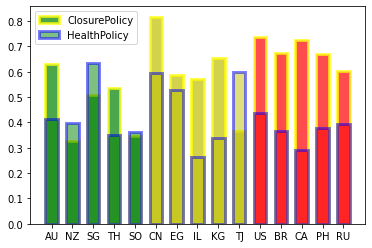

In [71]:
plt.bar(x, y1, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', edgecolor='yellow', label='ClosurePolicy', lw=3)
plt.bar(x, y2, alpha=0.5, width=0.6, color='gggggyyyyyrrrrr', edgecolor='blue', label='HealthPolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

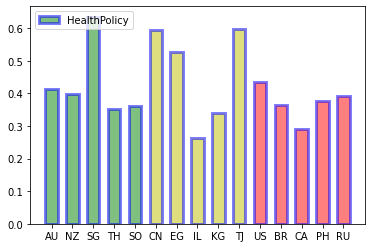

In [63]:
# plt.bar(x, y1, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', label='ClosurePolicy', lw=3)
plt.bar(x, y2, alpha=0.5, width=0.6, color='gggggyyyyyrrrrr', edgecolor='blue', label='HealthPolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

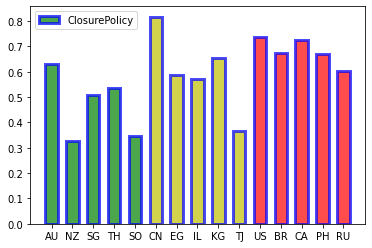

In [66]:
plt.bar(x, y1, alpha=0.7, width=0.6, color='gggggyyyyyrrrrr', edgecolor='blue', label='ClosurePolicy', lw=3)
# plt.bar(x, y2, alpha=0.5, width=0.6, color='gggggyyyyyrrrrr', edgecolor='blue', label='HealthPolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

In [68]:
x1 = ["SG","CN","CA"]
y11 = [SG_closure_average,CN_closure_average,CA_closure_average]
y22 = [SG_health_average,CN_health_average,CA_health_average]

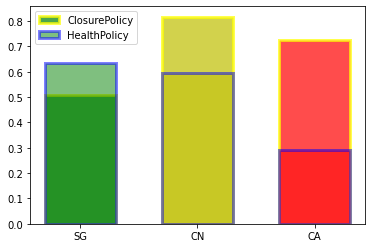

In [70]:
plt.bar(x1, y11, alpha=0.7, width=0.6, color='gyr', edgecolor='yellow', label='ClosurePolicy', lw=3)
plt.bar(x1, y22, alpha=0.5, width=0.6, color='gyr', edgecolor='blue', label='HealthPolicy', lw=3)
plt.legend(loc='upper left')
plt.show()

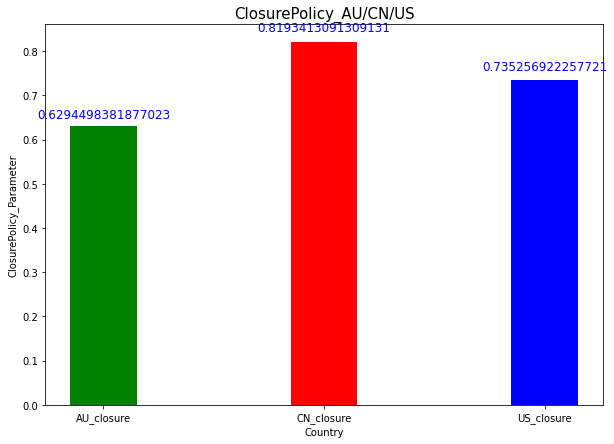

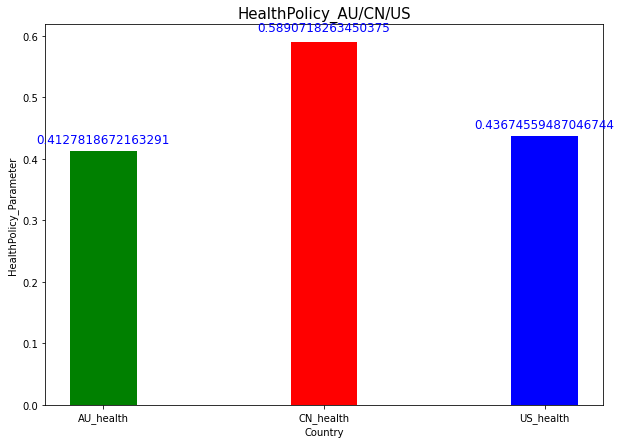

In [103]:
x = ["AU_closure", "CN_closure", "US_closure"]
y = [AU_closure_average, CN_closure_average, US_closure_average]
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(x=x, height=y, width=0.3, align="center", color="grb", linewidth=2.0)
ax.set_title("ClosurePolicy_AU/CN/US", fontsize=15)
plt.xlabel('Country')
plt.ylabel('ClosurePolicy_Parameter')
xticks = ax.get_xticks()
for i in range(len(y)):
    xy = (xticks[i], y[i] * 1.03)
    s = str(y[i])
    ax.annotate(s=s, xy=xy, fontsize=12, color="blue", ha="center", va="baseline" )
    
a = ["AU_health", "CN_health", "US_health"]
b = [AU_health_average, CN_health_average, US_health_average]
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(x=a, height=b, width=0.3, align="center", color="grb", linewidth=2.0)
ax.set_title("HealthPolicy_AU/CN/US", fontsize=15)
plt.xlabel('Country')
plt.ylabel('HealthPolicy_Parameter')
aticks = ax.get_xticks()
for i in range(len(b)):
    ab = (aticks[i], b[i] * 1.03)
    s = str(b[i])
    ax.annotate(s=s, xy=ab, fontsize=12, color="blue", ha="center", va="baseline" )
    
plt.show()